In [40]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from sklearn.svm import SVC;
from sklearn.metrics import accuracy_score;
from sklearn.preprocessing import StandardScaler;
from matplotlib.colors import ListedColormap;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import confusion_matrix;
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder;

In [41]:
df=pd.read_csv("Social_Network_Ads.csv")


In [42]:
mappings=list()
encoder=LabelEncoder()

In [43]:
for i in range(len(df.columns)):
    df[df.columns[i]]=encoder.fit_transform(df[df.columns[i]])
    mappings_dict={index:Label for index,Label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)
  

In [44]:
X=df.iloc[:,[2,3]].values
Y=df.iloc[:,-1].values

In [45]:
X

array([[  1,   4],
       [ 17,   5],
       [  8,  26],
       [  9,  39],
       [  1,  57],
       [  9,  40],
       [  9,  65],
       [ 14, 116],
       [  7,  17],
       [ 17,  47],
       [  8,  61],
       [  8,  35],
       [  2,  67],
       [ 14,   3],
       [  0,  63],
       [ 11,  61],
       [ 29,   9],
       [ 27,  10],
       [ 28,  12],
       [ 30,  13],
       [ 27,   7],
       [ 29,  32],
       [ 30,  24],
       [ 27,   7],
       [ 28,   8],
       [ 29,   5],
       [ 31,  12],
       [ 29,  14],
       [ 11,  26],
       [ 13,   3],
       [ 13,  55],
       [  9, 105],
       [  3,   1],
       [ 10,  27],
       [  9,  71],
       [ 17,  11],
       [ 15,  12],
       [ 12,  32],
       [  8,  53],
       [  9,  15],
       [  9,   2],
       [ 15,  34],
       [ 17,  85],
       [ 12,   0],
       [ 10,  65],
       [  5,   5],
       [  7,  60],
       [  9,  37],
       [ 12, 104],
       [ 13,  70],
       [  6,  16],
       [  0,  27],
       [ 11,

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [47]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [48]:
classifier=RandomForestClassifier(criterion='entropy',n_estimators=300)
classifier.fit(X_train,Y_train)
scores=classifier.score(X_test,Y_test)
Y_pred=classifier.predict(X_test)
print(scores)

0.91


In [49]:
confusion_matrix(Y_test,Y_pred)

array([[63,  5],
       [ 4, 28]], dtype=int64)

In [50]:
accuracy_score(Y_test,Y_pred)

0.91

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


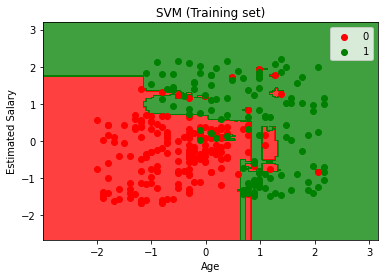

In [51]:
X_set,Y_set=X_train,Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


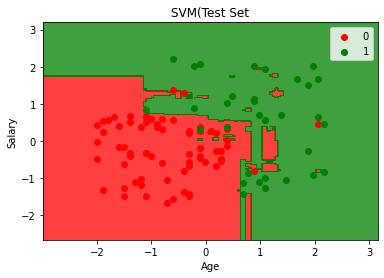

In [52]:
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("SVM(Test Set")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()